## Project: Titanic - Machine Learning from Disaster

![title](header.png)

In [37]:
import pandas as pd
import numpy as np

In [38]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

- sibsp	 # of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic
- fare	Passenger fare
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [39]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


nhìn thấy cột pasengerId same cột Index và trong quá trình training cột "PassengerId" kh hữu ích lắm

In [40]:
train_df.set_index("PassengerId", inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
test_df.set_index("PassengerId", inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1. Feature classification: Categorical vs Numerical

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch (SibSp, Parch mặc dù là biến liên tục nhưng do số liệu quá ít dẫn đến nó thành rời rạc)
- Numerical: (continuous) Age, Fare, (discrete)
- Mix types of data: Ticket, Cabin
- Contain Error/Typo: Name
- Blank or Null: Cabin > Age Embarked
- Various Data Type: String, Int, Float

Chuyển những catgorical mình phần tích thành type category

In [44]:
train_df['Survived'] = train_df['Survived'].astype("category")

In [45]:
cols_to_category = ['Sex', 'SibSp', 'Parch', 'Embarked', 'Pclass']

for col in cols_to_category:
    train_df[col] = train_df[col].astype("category")
    test_df[col] = test_df[col].astype("category")

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## Lý do chuyển về hết category để có thể thống kê dễ dàng hơn

distribution cho biến liên tục

In [47]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


distribution cho biến rời rạc
- ->top : biến xuất hiện nhiều nhất -> freq: tần suất của biến xuất hiện nhiều nhất

In [48]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [49]:
print(train_df['Survived'])

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]


## EDA Data

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

### với biến rời rạc

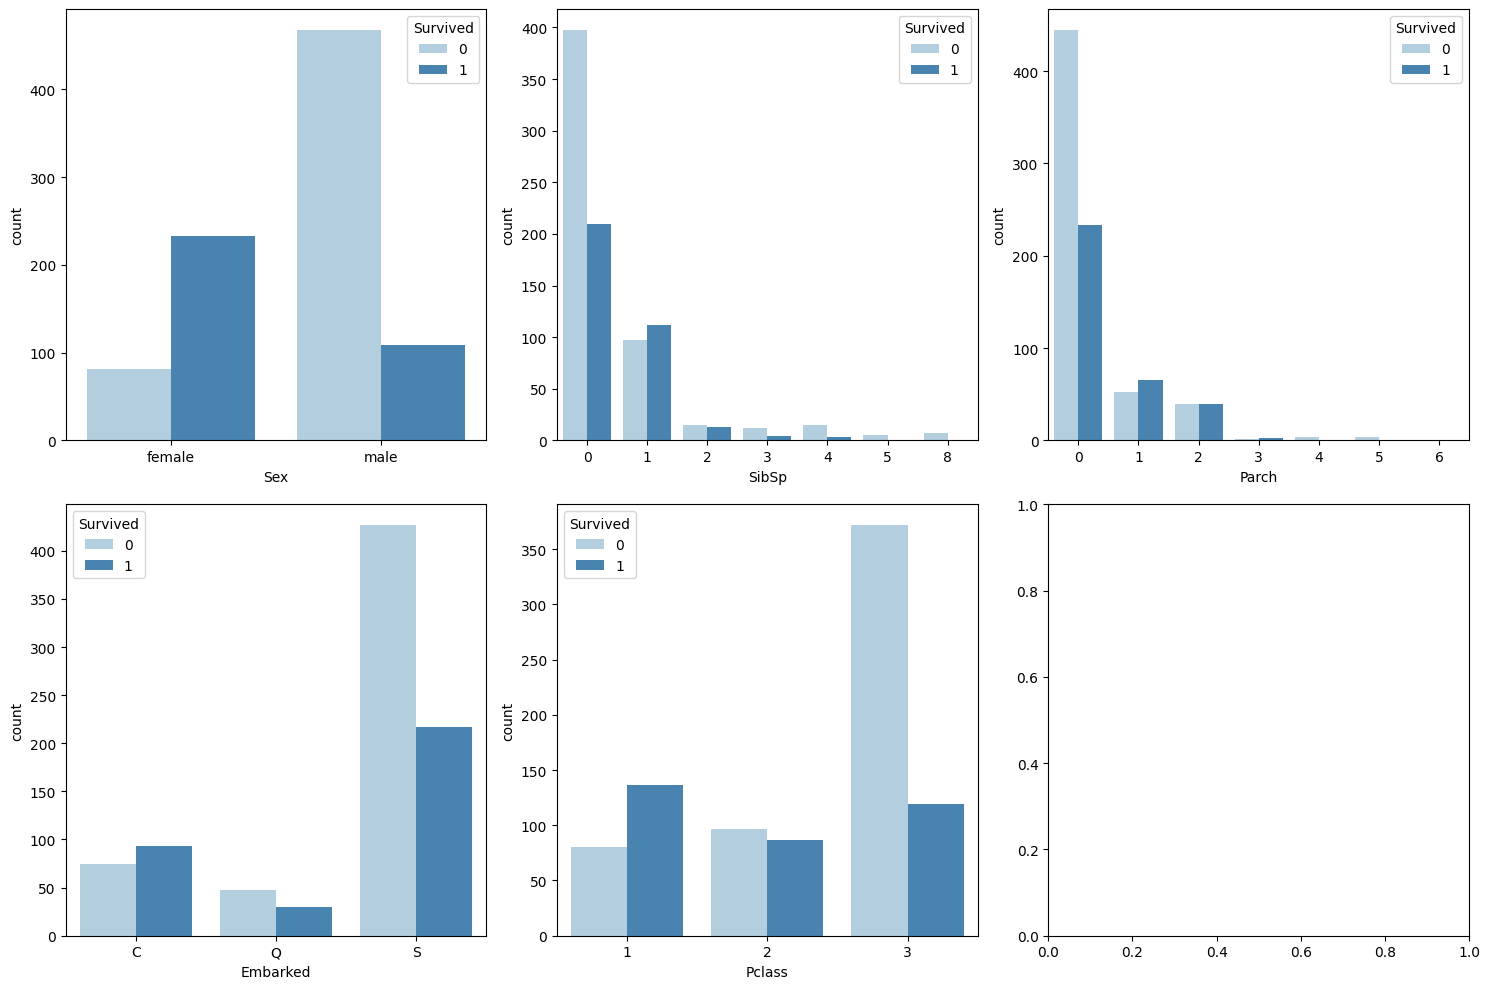

In [52]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
ax = ax.flatten()
for i in range(len(cols_to_category)):
    sns.countplot(data=train_df, x=cols_to_category[i],hue="Survived", ax=ax[i], palette="Blues")
plt.tight_layout()

### Với biến liên tục

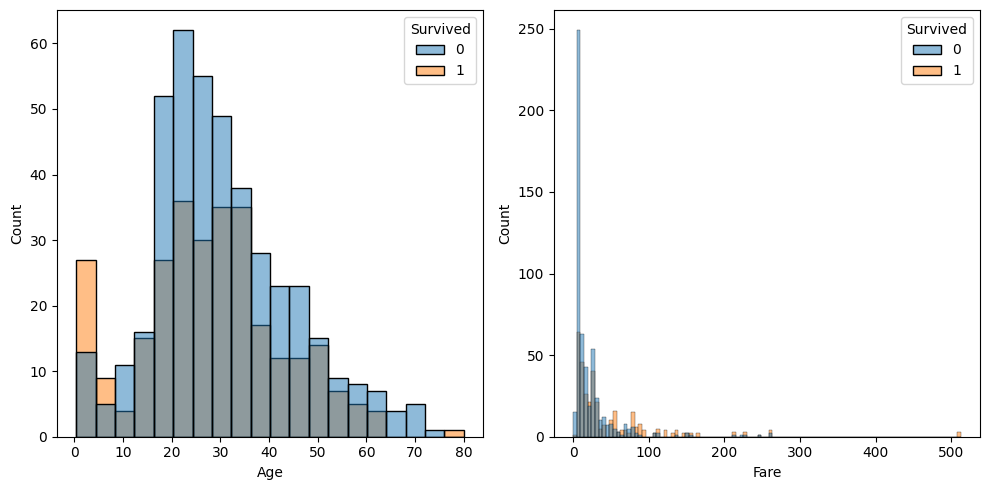

In [57]:
col_numerical = ['Age','Fare']
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax = ax.flatten()
for i in range(len(col_numerical)):
    sns.histplot(
        data=train_df, x=col_numerical[i], hue="Survived", ax=ax[i])
plt.tight_layout()

- Distribution of Fare 
    - Fare kh tuân theo normal distribution , tập trung mạnh khoảng 0 - 100
    - Distribution skewed về trái 75% là 31 , max pair là 512
biểu đồ fare khó nhìn , điều chỉnh để plot lại

In [58]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Vé loại Expensive và Luxury khả năng sống sót cao

<Axes: xlabel='Fare', ylabel='count'>

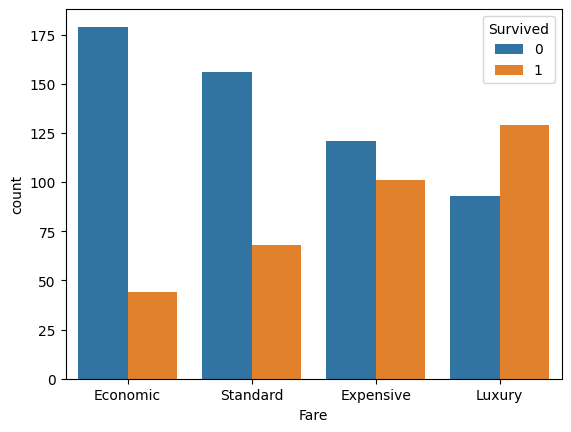

In [62]:
# To name for 0-25%, 25-50, 50-75, 75-100
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data =  pd.qcut(train_df['Fare'], 4,labels=fare_categories)

sns.countplot(x = quartile_data, hue=train_df['Survived'])

## 